# Exploratory data analysis: graphs and correlation matrix
# Preprocessing and creating final CSV file

In [1]:
import time
from datetime import datetime

import pandas as pd
import numpy as np
from geopy.distance import geodesic

In [22]:
def clean_dataset(frame):
    frame.drop(columns=[
        'id',
        'listing_url',
        'scrape_id',
        'name',
        'description',
        'neighborhood_overview',
        'picture_url',
        'host_id',
        'host_url',
        'host_name',
        'host_location',
        'host_about',
        'host_thumbnail_url',
        'host_picture_url',
        'host_neighbourhood',
        'neighbourhood',
        'neighbourhood_group_cleansed',
        'property_type',
        'bathrooms',
        'bedrooms',
        'amenities',
        'calendar_updated',
        'calendar_last_scraped',
        'first_review',
        'last_review',
        'license',
        'host_verifications'
    ], inplace=True)
    frame['price'] = frame['price'].apply(
        lambda x: str(x).replace('$', '').replace(' ', '').replace(',', '')
    ).astype('float')
    frame['bathrooms_text'] = frame['bathrooms_text'].str.extract(r'(\d+\.?\d*)').astype(float)
    frame['bathrooms_text'].fillna(frame['bathrooms_text'].median())
    frame['accommodates'].fillna(frame['accommodates'].median())
    frame['beds'].fillna(frame['beds'].median())
    return frame


def get_min_distance(airbnb_lat, airbnb_lng, tourist_df):
    distances = []
    for _, row in tourist_df.iterrows():
        lat, lng = row['lat'], row['lng']
        distances.append(geodesic((airbnb_lat, airbnb_lng), (lat, lng)).meters)
    return min(distances)


# create new closest attraction column and set value of minimum distance
def clean_location(frame, tourist_spots_df):
    frame['closest_attraction_distance'] = frame.apply(
        lambda row: get_min_distance(row['latitude'], row['longitude'], tourist_spots_df), axis=1
    )
    return frame


csv_list = [
    'data/Athens/dec/listings.csv',
    'data/Athens/jun/listings.csv',
    'data/Athens/mar/listings.csv',
    'data/Athens/sep/listings.csv',
    'data/Berlin/dec/listings.csv',
    'data/Berlin/jun/listings.csv',
    'data/Berlin/mar/listings.csv',
    'data/Madrid/dec/listings.csv',
    'data/Madrid/jun/listings.csv',
    'data/Madrid/mar/listings.csv',
    'data/Madrid/sep/listings.csv',
    'data/Paris/dec/listings.csv',
    'data/Paris/jun/listings.csv',
    'data/Paris/mar/listings.csv',
    'data/Paris/sep/listings.csv',
    'data/Rome/dec/listings.csv',
    'data/Rome/jun/listings.csv',
    'data/Rome/mar/listings.csv',
    'data/Rome/sep/listings.csv',
    'data/Vienna/dec/listings.csv',
    'data/Vienna/jun/listings.csv',
    'data/Vienna/mar/listings.csv',
    'data/Vienna/sep/listings.csv',
]

cities_list = [
    'Athens',
    'Athens',
    'Athens',
    'Athens',
    'Berlin',
    'Berlin',
    'Berlin',
    'Madrid',
    'Madrid',
    'Madrid',
    'Madrid',
    'Paris',
    'Paris',
    'Paris',
    'Paris',
    'Rome',
    'Rome',
    'Rome',
    'Rome',
    'Vienna',
    'Vienna',
    'Vienna',
    'Vienna',
]

attractions_list = [0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5]
attractions_df = pd.read_csv('data/tourist_spots.csv')
frames_list = []
for index, csv_file in enumerate(csv_list):
    df = pd.read_csv(csv_file)
    df.dropna(subset=['price'], inplace=True)
    df['city'] = cities_list[index]
    df = clean_dataset(df)
    new_df = attractions_df[attractions_df['city'] == attractions_list[index]]
    df = clean_location(df, new_df)
    frames_list.append(df)

final_eda = pd.concat(frames_list, ignore_index=True)
final_eda.to_csv('data/eda.csv', index=False)
print("EDA CSV exported!")

EDA CSV exported!


# EDA processing starts from here

In [9]:
import time
from datetime import datetime

import pandas as pd
import numpy as np

In [10]:
eda_df = pd.read_csv('data/eda.csv')
eda_df = eda_df[(eda_df['price'] > 0.0)]
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587516 entries, 0 to 587516
Data columns (total 50 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   last_scraped                                  587516 non-null  object 
 1   source                                        587516 non-null  object 
 2   host_since                                    587487 non-null  object 
 3   host_response_time                            477755 non-null  object 
 4   host_response_rate                            477755 non-null  object 
 5   host_acceptance_rate                          512317 non-null  object 
 6   host_is_superhost                             580028 non-null  object 
 7   host_listings_count                           587487 non-null  float64
 8   host_total_listings_count                     587487 non-null  float64
 9   host_has_profile_pic                          587487 

In [11]:
eda_df.describe()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,closest_attraction_distance
count,587487.000000,587487.000000,587516.000000,587516.000000,587516.000000,584193.000000,584720.000000,587516.000000,587516.000000,5.875160e+05,...,459669.000000,459689.000000,459675.000000,459659.000000,587516.000000,587516.000000,587516.000000,587516.000000,459804.000000,587516.000000
mean,32.077287,42.492307,45.470107,6.847178,3.446148,1.233142,1.879376,202.153021,12.069784,1.142784e+04,...,4.806605,4.816914,4.765102,4.624362,22.671168,20.993920,1.516794,0.089572,1.629455,1643.947428
std,111.148450,162.767889,4.366768,8.063325,1.878383,0.601494,1.407991,579.538744,48.417567,4.852659e+06,...,0.354430,0.360351,0.342051,0.431017,73.787268,72.511523,9.965867,1.502888,1.723207,2290.679876
min,0.000000,0.000000,37.950322,-3.835330,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.616768
25%,1.000000,1.000000,41.864983,2.316500,2.000000,1.000000,1.000000,80.000000,1.000000,4.500000e+01,...,4.770000,4.790000,4.670000,4.500000,1.000000,1.000000,0.000000,0.000000,0.410000,526.217992
50%,2.000000,3.000000,48.268639,2.371486,3.000000,1.000000,2.000000,120.000000,2.000000,3.650000e+02,...,4.910000,4.930000,4.870000,4.720000,2.000000,1.000000,0.000000,0.000000,1.050000,1046.460240
75%,11.000000,14.000000,48.867580,12.507639,4.000000,1.000000,2.000000,200.000000,3.000000,1.125000e+03,...,5.000000,5.000000,5.000000,4.880000,9.000000,6.000000,0.000000,0.000000,2.310000,1913.363047
max,7397.000000,9520.000000,52.652280,23.780220,16.000000,49.000000,90.000000,84420.000000,1125.000000,2.147484e+09,...,5.000000,5.000000,5.000000,5.000000,781.000000,781.000000,268.000000,51.000000,84.180000,28064.399149


In [12]:
stats = eda_df[['latitude', 'longitude', 'price']]
stats.describe()

,latitude,longitude,price
count,587516.000000,587516.000000,587516.000000
mean,45.470107,6.847178,202.153021
std,4.366768,8.063325,579.538744
min,37.950322,-3.835330,1.000000
25%,41.864983,2.316500,80.000000
50%,48.268639,2.371486,120.000000
75%,48.867580,12.507639,200.000000
max,52.652280,23.780220,84420.000000


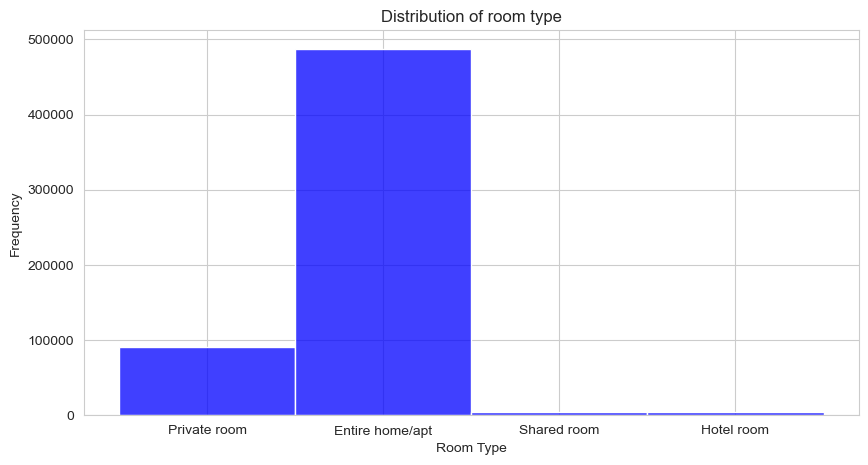

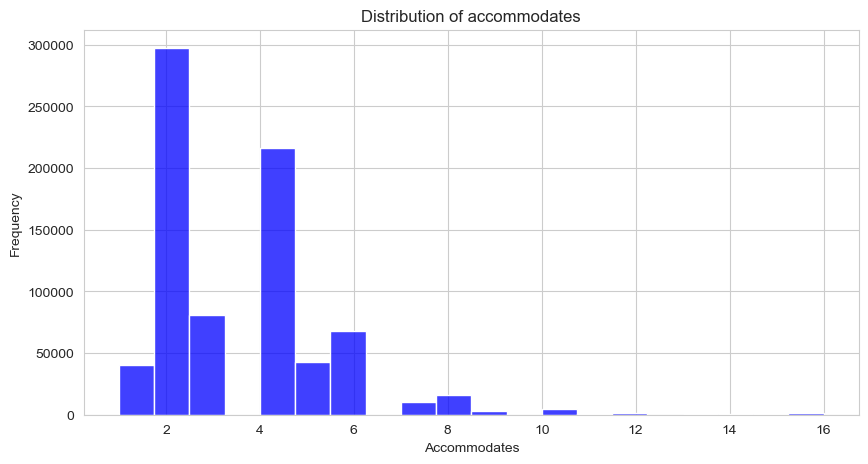

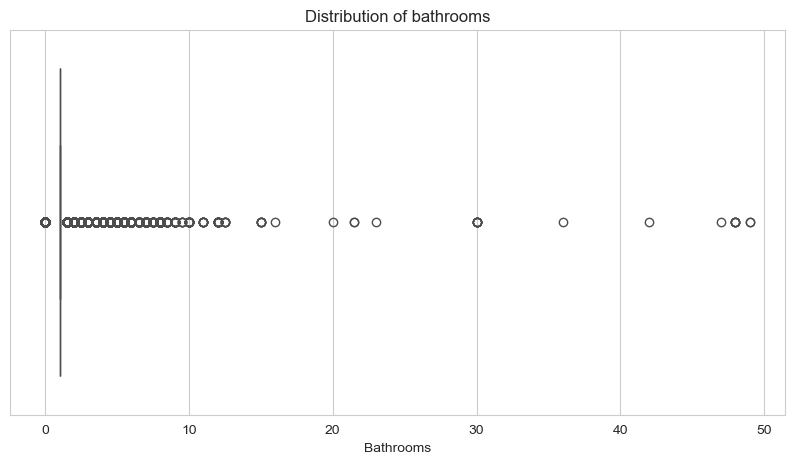

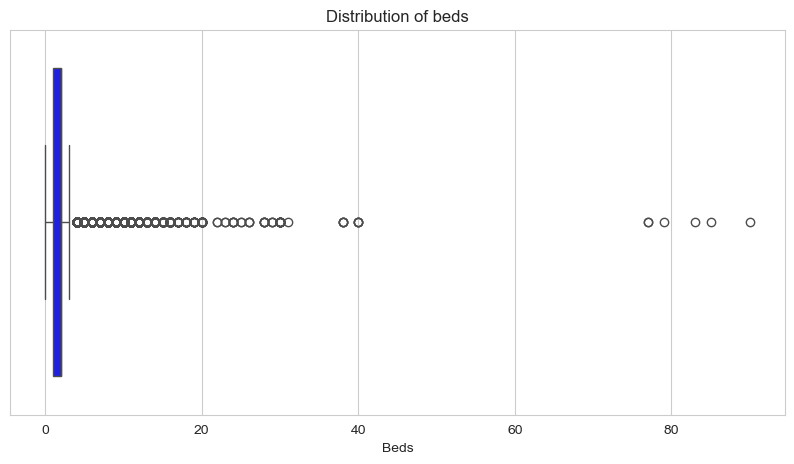

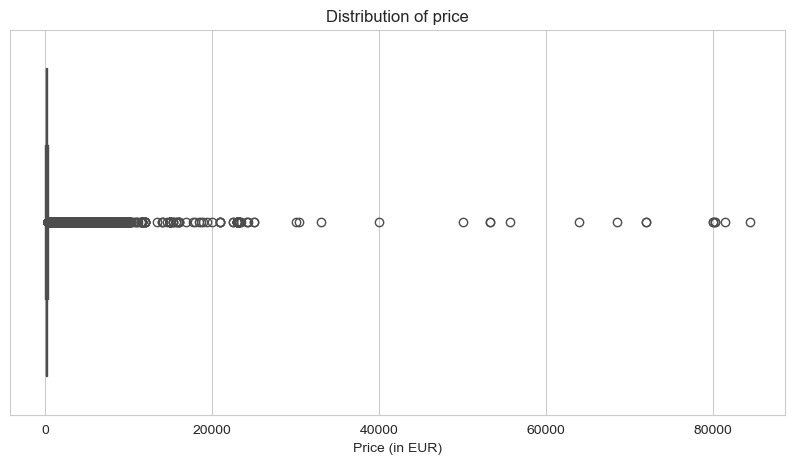

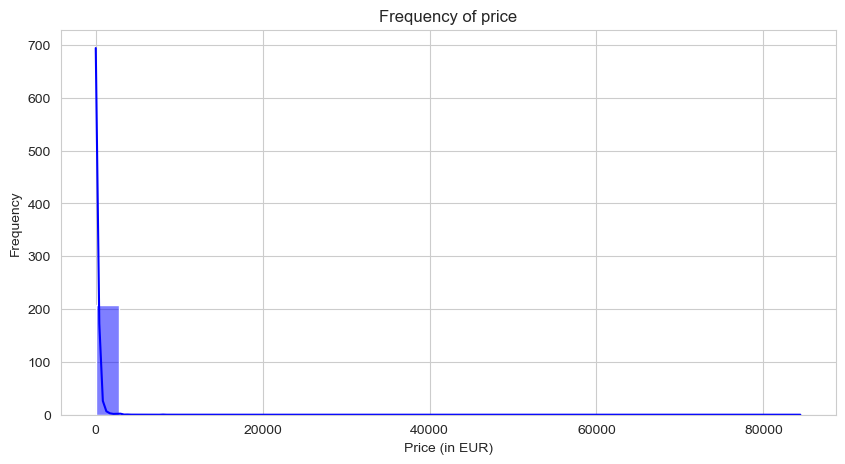

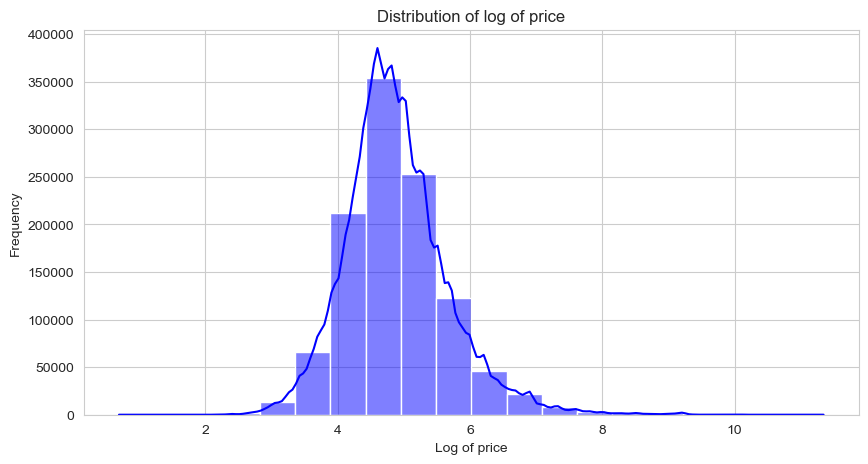

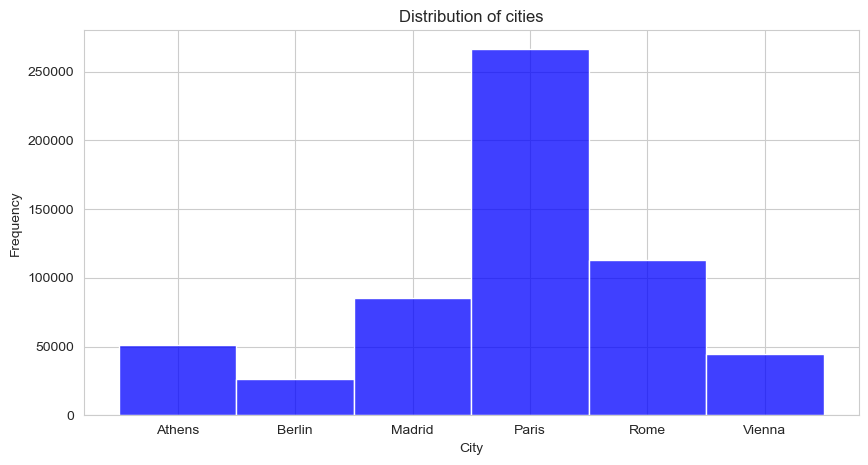

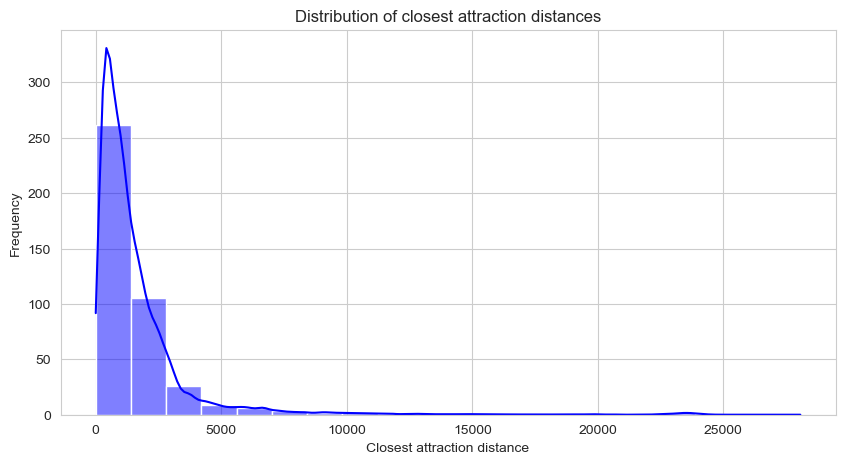

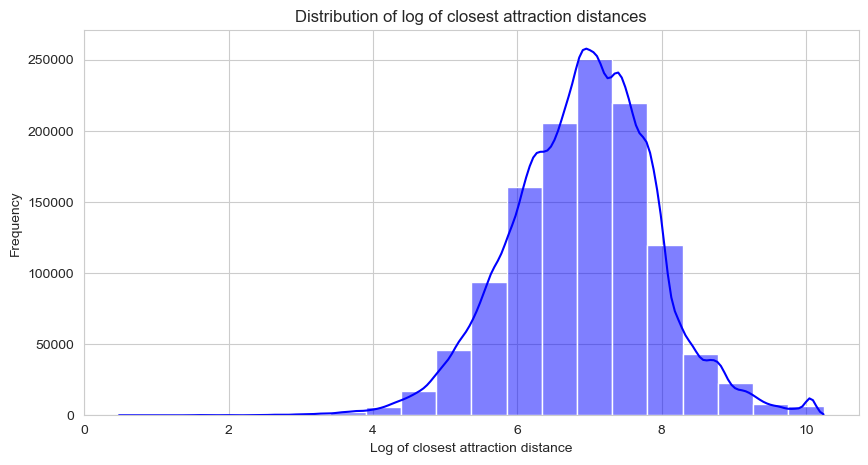

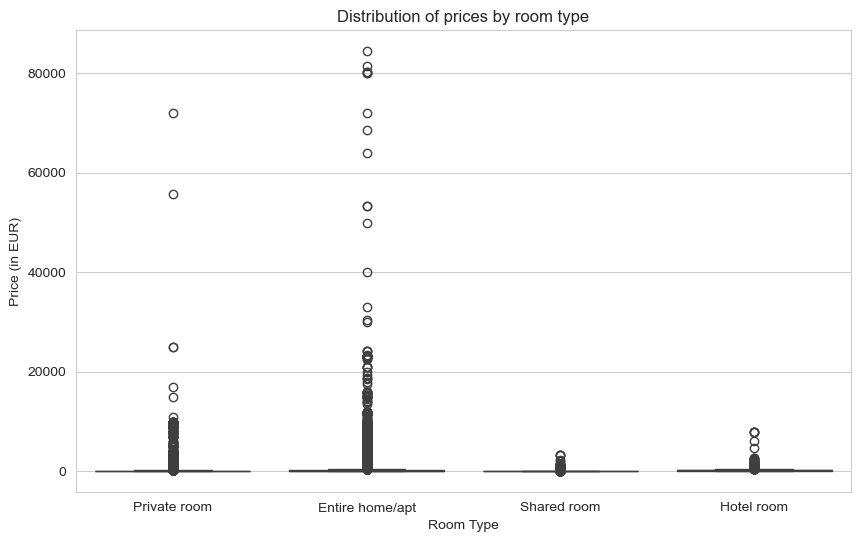

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(eda_df['room_type'], kde=False, color='blue', stat='frequency')
plt.title(f'Distribution of room type')
plt.xlabel("Room Type")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(eda_df['accommodates'], bins=20, kde=False, color='blue', stat='frequency')
plt.title(f'Distribution of accommodates')
plt.xlabel("Accommodates")
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=eda_df['bathrooms_text'], color='blue')
plt.title(f'Distribution of bathrooms')
plt.xlabel("Bathrooms")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=eda_df['beds'], color='blue')
plt.title(f'Distribution of beds')
plt.xlabel("Beds")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=eda_df['price'], color='blue')
plt.title(f'Distribution of price')
plt.xlabel("Price (in EUR)")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(eda_df['price'], bins=30, kde=True, color='blue', stat='frequency')
plt.title(f'Frequency of price')
plt.xlabel("Price (in EUR)")
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(eda_df['price']), bins=20, kde=True, color='blue', stat='frequency')
plt.title(f'Distribution of log of price')
plt.xlabel("Log of price")
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(eda_df['city'], bins=6, kde=False, color='blue', stat='frequency')
plt.title(f'Distribution of cities')
plt.xlabel("City")
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(eda_df['closest_attraction_distance'], bins=20, kde=True, color='blue', stat='frequency')
plt.title(f'Distribution of closest attraction distances')
plt.xlabel("Closest attraction distance")
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(eda_df['closest_attraction_distance']), bins=20, kde=True, color='blue', stat='frequency')
plt.title(f'Distribution of log of closest attraction distances')
plt.xlabel("Log of closest attraction distance")
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=eda_df)
plt.title('Distribution of prices by room type')
plt.xlabel('Room Type')
plt.ylabel('Price (in EUR)')
plt.show()

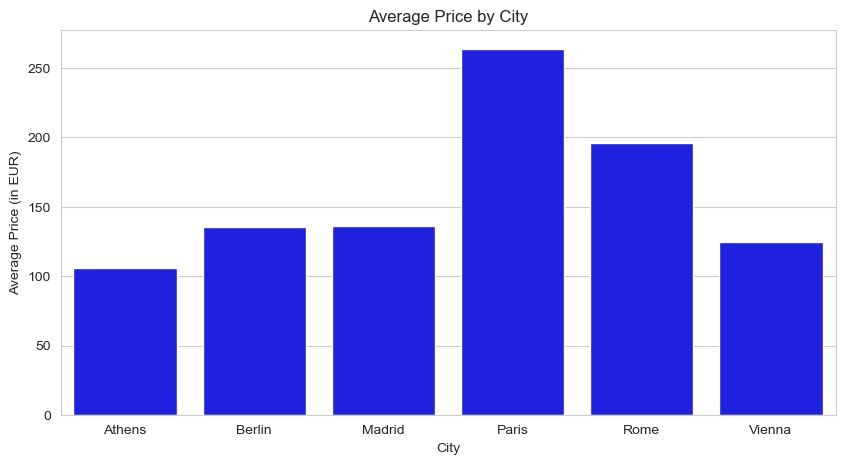

In [14]:
# Assuming 'df' is your Airbnb dataset DataFrame
# Step 1: Calculate the average price by city
average_price_by_city = eda_df.groupby('city')['price'].mean().reset_index()

# Step 2: Sort the values (optional but helpful for clearer visualization)
# average_price_by_city = average_price_by_city.sort_values(by='price', ascending=False)

# Step 3: Create a bar plot using Seaborn
plt.figure(figsize=(10, 5))  # Adjust the size of the plot
sns.barplot(data=average_price_by_city, x='city', y='price', color='blue')

# Step 4: Add titles and labels
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price (in EUR)')  # Rotate x-axis labels if necessary for better readability # Adjust layout to prevent overlap
# Show the plot
plt.show()

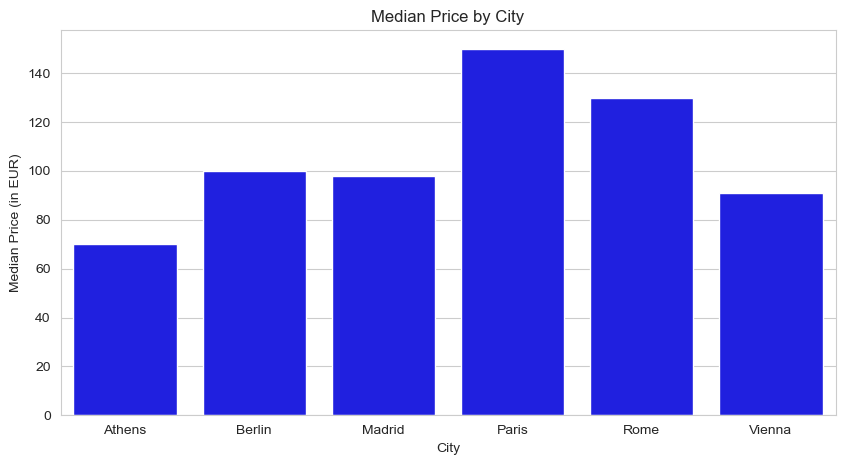

In [15]:
# Step 1: Calculate the average price by city
median_price_by_city = eda_df.groupby('city')['price'].median().reset_index()

# Step 2: Sort the values (optional but helpful for clearer visualization)
# average_price_by_city = average_price_by_city.sort_values(by='price', ascending=False)

# Step 3: Create a bar plot using Seaborn
plt.figure(figsize=(10, 5))  # Adjust the size of the plot
sns.barplot(data=median_price_by_city, x='city', y='price', color='blue')

# Step 4: Add titles and labels
plt.title('Median Price by City')
plt.xlabel('City')
plt.ylabel('Median Price (in EUR)')  # Rotate x-axis labels if necessary for better readability # Adjust layout to prevent overlap
# Show the plot
plt.show()

In [16]:
stats = {
    'Metric': ['Mean', 'Median', 'Standard Deviation'],
    'Latitude': [eda_df['latitude'].mean(), eda_df['latitude'].median(), eda_df['latitude'].std()],
    'Longitude': [eda_df['longitude'].mean(), eda_df['longitude'].median(), eda_df['longitude'].std()],
    'Price': [eda_df['price'].mean(), eda_df['price'].median(), eda_df['price'].std()]
}

stats_df = pd.DataFrame(stats)
print(stats_df)

               Metric   Latitude  Longitude       Price
0                Mean  45.470107   6.847178  202.153021
1              Median  48.268639   2.371486  120.000000
2  Standard Deviation   4.366768   8.063325  579.538744


In [17]:
eda_df.describe()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,closest_attraction_distance
count,587487.000000,587487.000000,587516.000000,587516.000000,587516.000000,584193.000000,584720.000000,587516.000000,587516.000000,5.875160e+05,...,459669.000000,459689.000000,459675.000000,459659.000000,587516.000000,587516.000000,587516.000000,587516.000000,459804.000000,587516.000000
mean,32.077287,42.492307,45.470107,6.847178,3.446148,1.233142,1.879376,202.153021,12.069784,1.142784e+04,...,4.806605,4.816914,4.765102,4.624362,22.671168,20.993920,1.516794,0.089572,1.629455,1643.947428
std,111.148450,162.767889,4.366768,8.063325,1.878383,0.601494,1.407991,579.538744,48.417567,4.852659e+06,...,0.354430,0.360351,0.342051,0.431017,73.787268,72.511523,9.965867,1.502888,1.723207,2290.679876
min,0.000000,0.000000,37.950322,-3.835330,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.616768
25%,1.000000,1.000000,41.864983,2.316500,2.000000,1.000000,1.000000,80.000000,1.000000,4.500000e+01,...,4.770000,4.790000,4.670000,4.500000,1.000000,1.000000,0.000000,0.000000,0.410000,526.217992
50%,2.000000,3.000000,48.268639,2.371486,3.000000,1.000000,2.000000,120.000000,2.000000,3.650000e+02,...,4.910000,4.930000,4.870000,4.720000,2.000000,1.000000,0.000000,0.000000,1.050000,1046.460240
75%,11.000000,14.000000,48.867580,12.507639,4.000000,1.000000,2.000000,200.000000,3.000000,1.125000e+03,...,5.000000,5.000000,5.000000,4.880000,9.000000,6.000000,0.000000,0.000000,2.310000,1913.363047
max,7397.000000,9520.000000,52.652280,23.780220,16.000000,49.000000,90.000000,84420.000000,1125.000000,2.147484e+09,...,5.000000,5.000000,5.000000,5.000000,781.000000,781.000000,268.000000,51.000000,84.180000,28064.399149


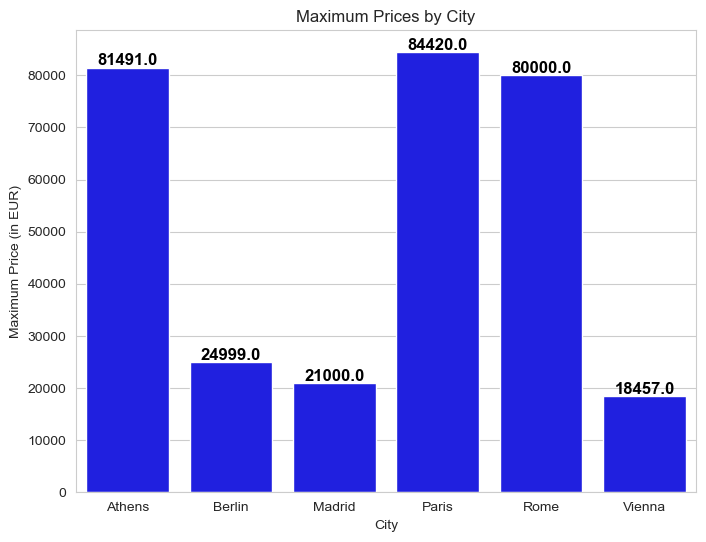

In [18]:
# Calculate the min and max prices per city
max_prices = eda_df.groupby('city')['price'].max().reset_index()

# Plotting the bar plot for max prices by city
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='city', y='price', data=max_prices, color='blue')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black', fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

# Customizing the plot
plt.title('Maximum Prices by City')
plt.xlabel('City')
plt.ylabel('Maximum Price (in EUR)')

plt.show()

In [39]:
average_price_by_city.rename(columns={'price': 'average_price'}, inplace=True)
median_price_by_city.rename(columns={'price': 'median_price'}, inplace=True)
max_prices.rename(columns={'price': 'max_price'}, inplace=True)

In [40]:
df_combined = pd.merge(average_price_by_city, median_price_by_city, on='city', how='outer')

# # Merge the result with df3
# df_combined = pd.merge(df_combined, max_prices, on='city', how='outer')

# Display the result
print(df_combined)

     city  average_price  median_price
0  Athens     106.202642          70.0
1  Berlin     135.809212         100.0
2  Madrid     136.081448          98.0
3   Paris     263.945917         150.0
4    Rome     195.731766         130.0
5  Vienna     124.631998          91.0


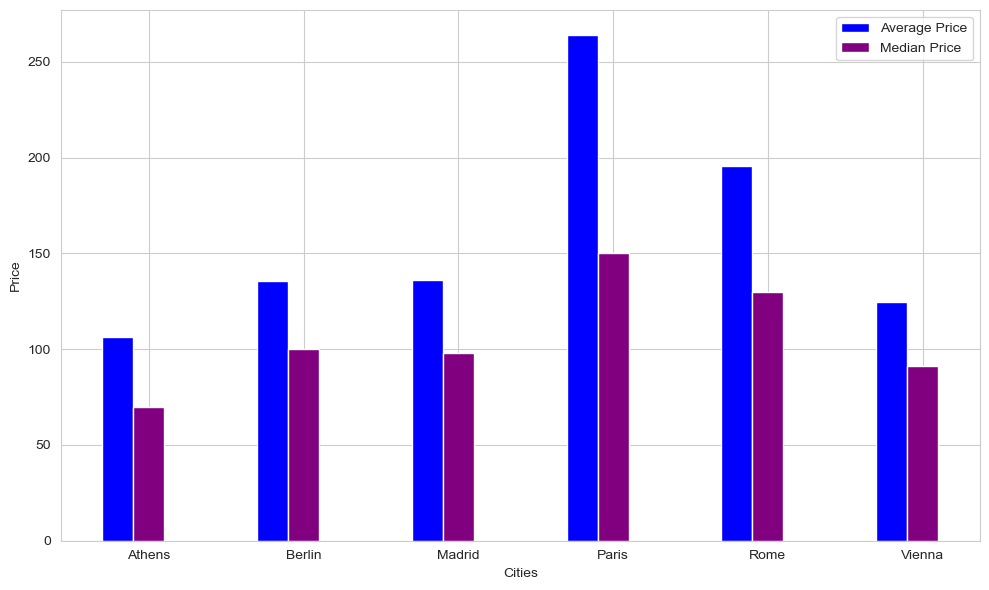

In [41]:
x = np.arange(len(df_combined))  # X positions for cities
width = 0.2
df_combined.set_index('city', inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, df_combined['average_price'], width, label='Average Price', color='b')
ax.bar(x, df_combined['median_price'], width, label='Median Price', color='purple')
# ax.bar(x + width, df_combined['max_price'], width, label='Max Price', color='r')

# Adding labels and title
ax.set_xlabel('Cities')
ax.set_ylabel('Price')
# ax.set_title('Price Comparison by City')
ax.set_xticks(x)
ax.set_xticklabels(df_combined.index)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Preprocessing starts here

In [23]:
def clean_booleans(frame):
    """
    This function cleans all true or false from the data file
    0 = false
    1 = true
    """
    boolean_dict = {'t': 1, 'f': 0, np.nan: 0}
    frame['host_is_superhost'] = frame['host_is_superhost'].map(boolean_dict)
    frame['host_has_profile_pic'] = frame['host_has_profile_pic'].map(boolean_dict)
    frame['host_identity_verified'] = frame['host_identity_verified'].map(boolean_dict)
    frame['has_availability'] = frame['has_availability'].map(boolean_dict)
    frame['instant_bookable'] = frame['instant_bookable'].map(boolean_dict)

    frame['host_response_rate'] = frame['host_response_rate'].apply(
        lambda x: str(x).replace('%', '').replace(' ', '').replace(',', '') if pd.notnull(x) else "0"
    ).apply(lambda x: float(x))
    # host acceptance rate: remove percentages and replace all NaNs with 0
    frame['host_acceptance_rate'] = frame['host_acceptance_rate'].apply(
        lambda x: str(x).replace('%', '').replace(' ', '').replace(',', '') if pd.notnull(x) else "0"
    ).astype('float')

    # fills NaNs with 0s inplace
    frame[[
        'host_listings_count',
        'host_total_listings_count',
        'minimum_nights',
        'maximum_nights',
        'minimum_minimum_nights',
        'maximum_minimum_nights',
        'minimum_maximum_nights',
        'maximum_maximum_nights',
        'minimum_nights_avg_ntm',
        'maximum_nights_avg_ntm',
        'availability_30',
        'availability_60',
        'availability_90',
        'availability_365',
        'number_of_reviews',
        'number_of_reviews_ltm',
        'number_of_reviews_l30d',
        'review_scores_rating',
        'review_scores_accuracy',
        'review_scores_cleanliness',
        'review_scores_checkin',
        'review_scores_communication',
        'review_scores_location',
        'review_scores_value',
        'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms',
        'reviews_per_month'
    ]] = frame[[
        'host_listings_count',
        'host_total_listings_count',
        'minimum_nights',
        'maximum_nights',
        'minimum_minimum_nights',
        'maximum_minimum_nights',
        'minimum_maximum_nights',
        'maximum_maximum_nights',
        'minimum_nights_avg_ntm',
        'maximum_nights_avg_ntm',
        'availability_30',
        'availability_60',
        'availability_90',
        'availability_365',
        'number_of_reviews',
        'number_of_reviews_ltm',
        'number_of_reviews_l30d',
        'review_scores_rating',
        'review_scores_accuracy',
        'review_scores_cleanliness',
        'review_scores_checkin',
        'review_scores_communication',
        'review_scores_location',
        'review_scores_value',
        'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms',
        'reviews_per_month'
    ]].fillna(0)

    frame['host_since'] = pd.to_datetime(frame['host_since'])
    current_date = datetime.now()
    frame['host_since'] = frame['host_since'].apply(
        lambda x: float(
            ((current_date.year - x.year) * 12) + (current_date.month - x.month) + (
                        (current_date.day - x.day) / 30)) if pd.notnull(x) else float(0)
    )
    # fixing scrape date: converting YYYY-MM-DD to year and month
    frame['last_scraped'] = pd.to_datetime(frame['last_scraped'])
    frame['scrape_year'] = frame['last_scraped'].dt.year
    frame['scrape_month'] = frame['last_scraped'].dt.month
    frame.drop('last_scraped', axis=1, inplace=True)
    frame['bathrooms_text'] = frame['bathrooms_text'].fillna(1)
    frame['accommodates'].fillna(frame['accommodates'].median())
    frame['beds'] = frame['beds'].fillna(1)
    return frame


def clean_neighbourhood(frame):
    frame['neighbourhood_cleansed'] = frame['neighbourhood_cleansed'].fillna("None")
    neighbourhood_frame = pd.read_csv('data/neighbourhood_csv.csv')
    name_to_value = neighbourhood_frame.set_index('name')['value']
    frame['neighbourhood_cleansed'] = frame['neighbourhood_cleansed'].map(name_to_value)
    frame['neighbourhood_cleansed'] = frame['neighbourhood_cleansed'].fillna(0)
    return frame


def one_hot_encoder(frame):
    frame['source'] = frame['source'].fillna('Unknown')
    frame['host_response_time'] = frame['host_response_time'].fillna('Unknown')
    frame['room_type'] = frame['room_type'].fillna('Unknown')
    frame['city'] = frame['city'].fillna('Unknown')
    frame = pd.get_dummies(frame, prefix=['source', 'host_response_time', 'room_type', 'city'],
                           columns=['source', 'host_response_time', 'room_type', 'city'])
    return frame

def create_log_vals(frame):
    frame['price'] = np.log1p(frame['price'])
    frame['closest_attraction_distance'] = np.log1p(frame['closest_attraction_distance'])
    return frame

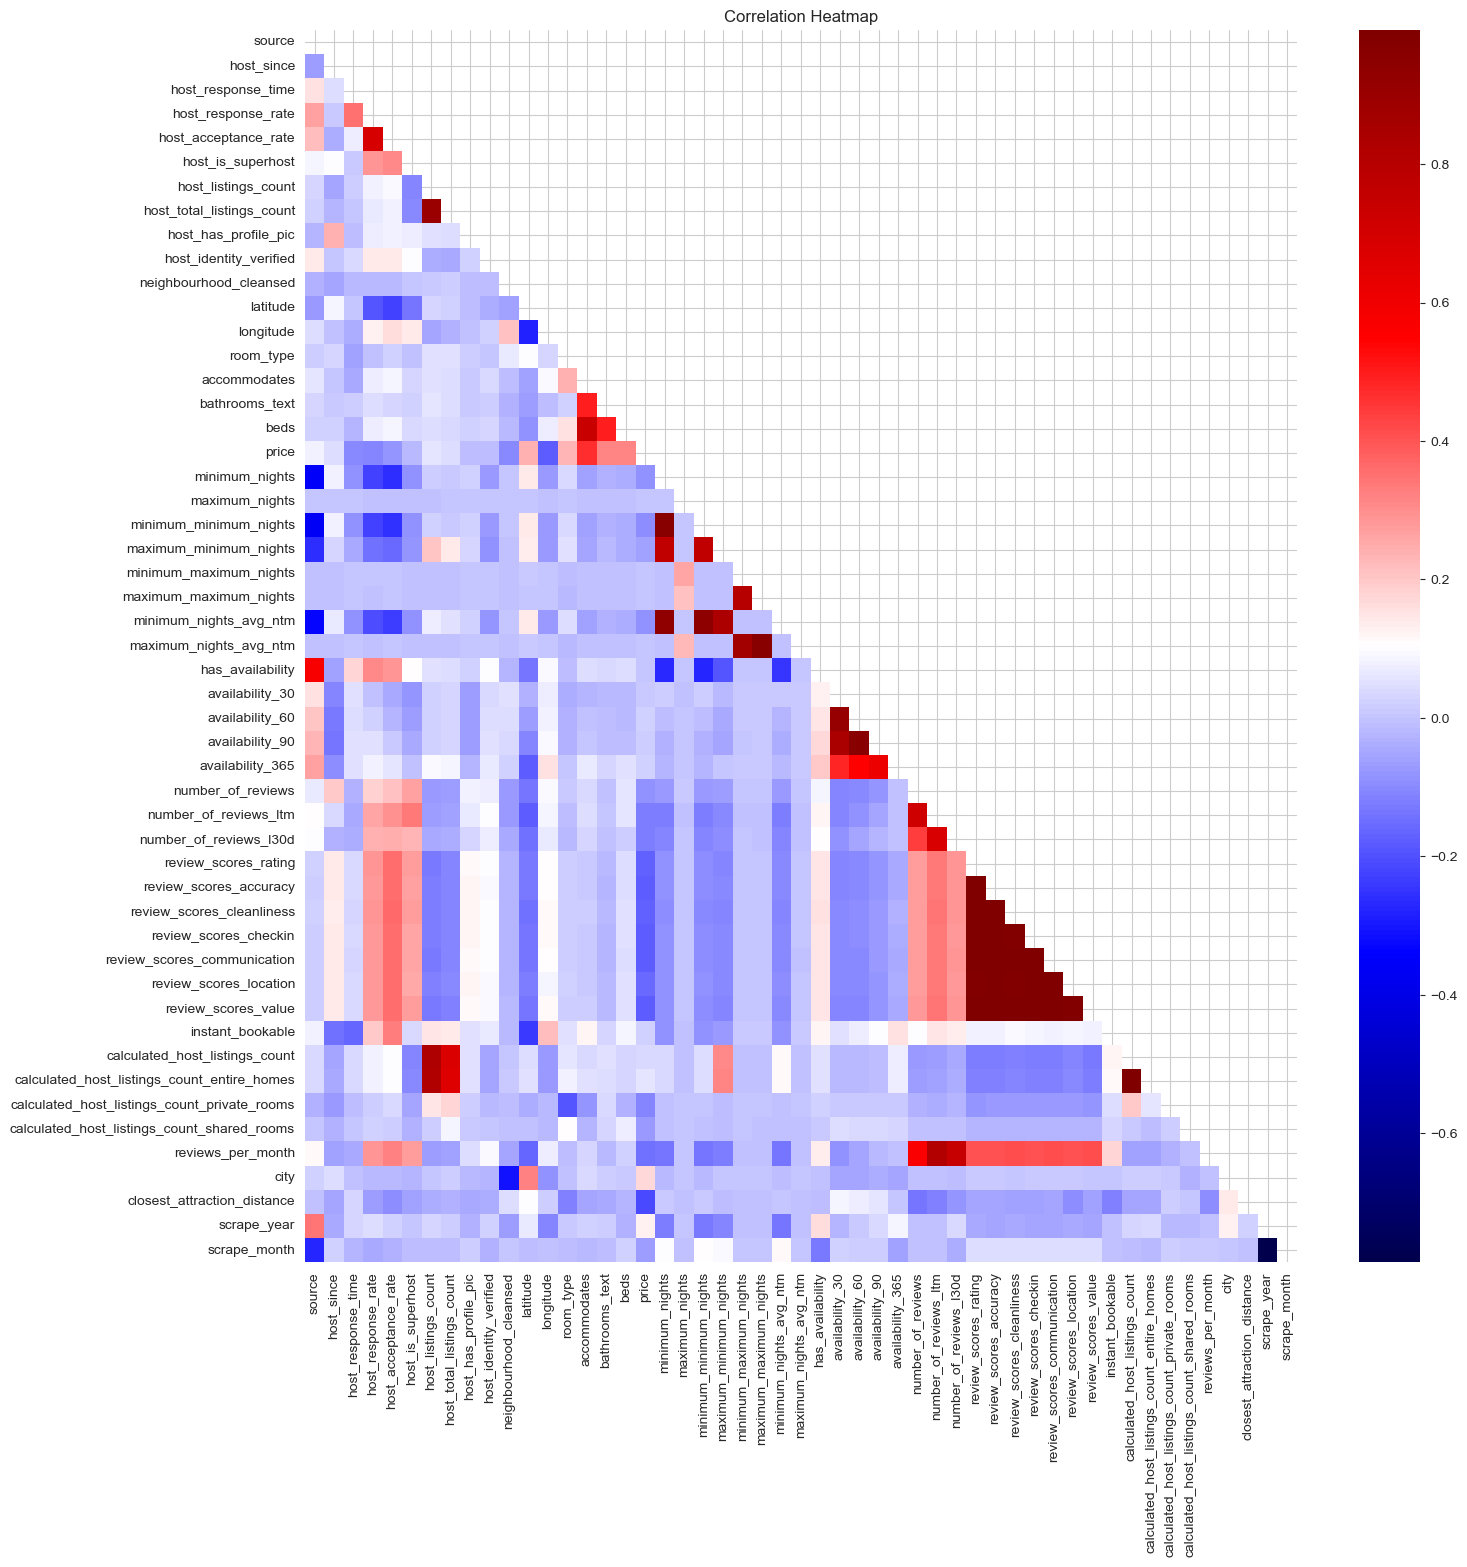

In [24]:
corr_df = eda_df.copy()
corr_df = clean_neighbourhood(corr_df)
corr_df = create_log_vals(corr_df)
corr_df = clean_booleans(corr_df)
corr_df['source'], _ = pd.factorize(corr_df['source'])
corr_df['host_response_time'], _ = pd.factorize(corr_df['host_response_time'])
corr_df['room_type'], _ = pd.factorize(corr_df['room_type'])
corr_df['city'], _ = pd.factorize(corr_df['city'])

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = corr_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 16))
# Create the heatmap
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=False,
            fmt=".2f",
            cmap="seismic",
            cbar=True)

# Add a title
plt.title("Correlation Heatmap")
plt.show()


In [25]:
df = clean_booleans(eda_df)
df = clean_neighbourhood(df)
df = one_hot_encoder(df)
df = create_log_vals(df)

df.to_csv('data/final.csv', index=False)
print("Export successful!")

Export successful!


# Final CSV file created

In [26]:
final_df = pd.read_csv('data/final.csv')
boolean_columns = final_df.select_dtypes(include='bool').columns
final_df[boolean_columns] = final_df[boolean_columns].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587516 entries, 0 to 587515
Data columns (total 64 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   host_since                                    587516 non-null  float64
 1   host_response_rate                            587516 non-null  float64
 2   host_acceptance_rate                          587516 non-null  float64
 3   host_is_superhost                             587516 non-null  int64  
 4   host_listings_count                           587516 non-null  float64
 5   host_total_listings_count                     587516 non-null  float64
 6   host_has_profile_pic                          587516 non-null  int64  
 7   host_identity_verified                        587516 non-null  int64  
 8   neighbourhood_cleansed                        587516 non-null  int64  
 9   latitude                                      58

In [27]:
final_df.head()

,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,city_Athens,city_Berlin,city_Madrid,city_Paris,city_Rome,city_Vienna
0,84.500000,0.0,0.0,0,1.0,1.0,1,1,33,37.99443,...,0,0,1,0,1,0,0,0,0,0
1,61.933333,100.0,0.0,0,1.0,2.0,1,1,22,37.97919,...,1,0,0,0,1,0,0,0,0,0
2,64.966667,100.0,96.0,1,1.0,1.0,1,1,24,37.96600,...,1,0,0,0,1,0,0,0,0,0
3,36.233333,100.0,100.0,0,1.0,1.0,1,1,16,37.97589,...,1,0,0,0,1,0,0,0,0,0
4,76.866667,100.0,100.0,0,3.0,3.0,1,1,16,37.97922,...,1,0,0,0,1,0,0,0,0,0


In [28]:
print("Does final df have nan values? ", final_df.isnull().values.any())

Does final df have nan values?  False


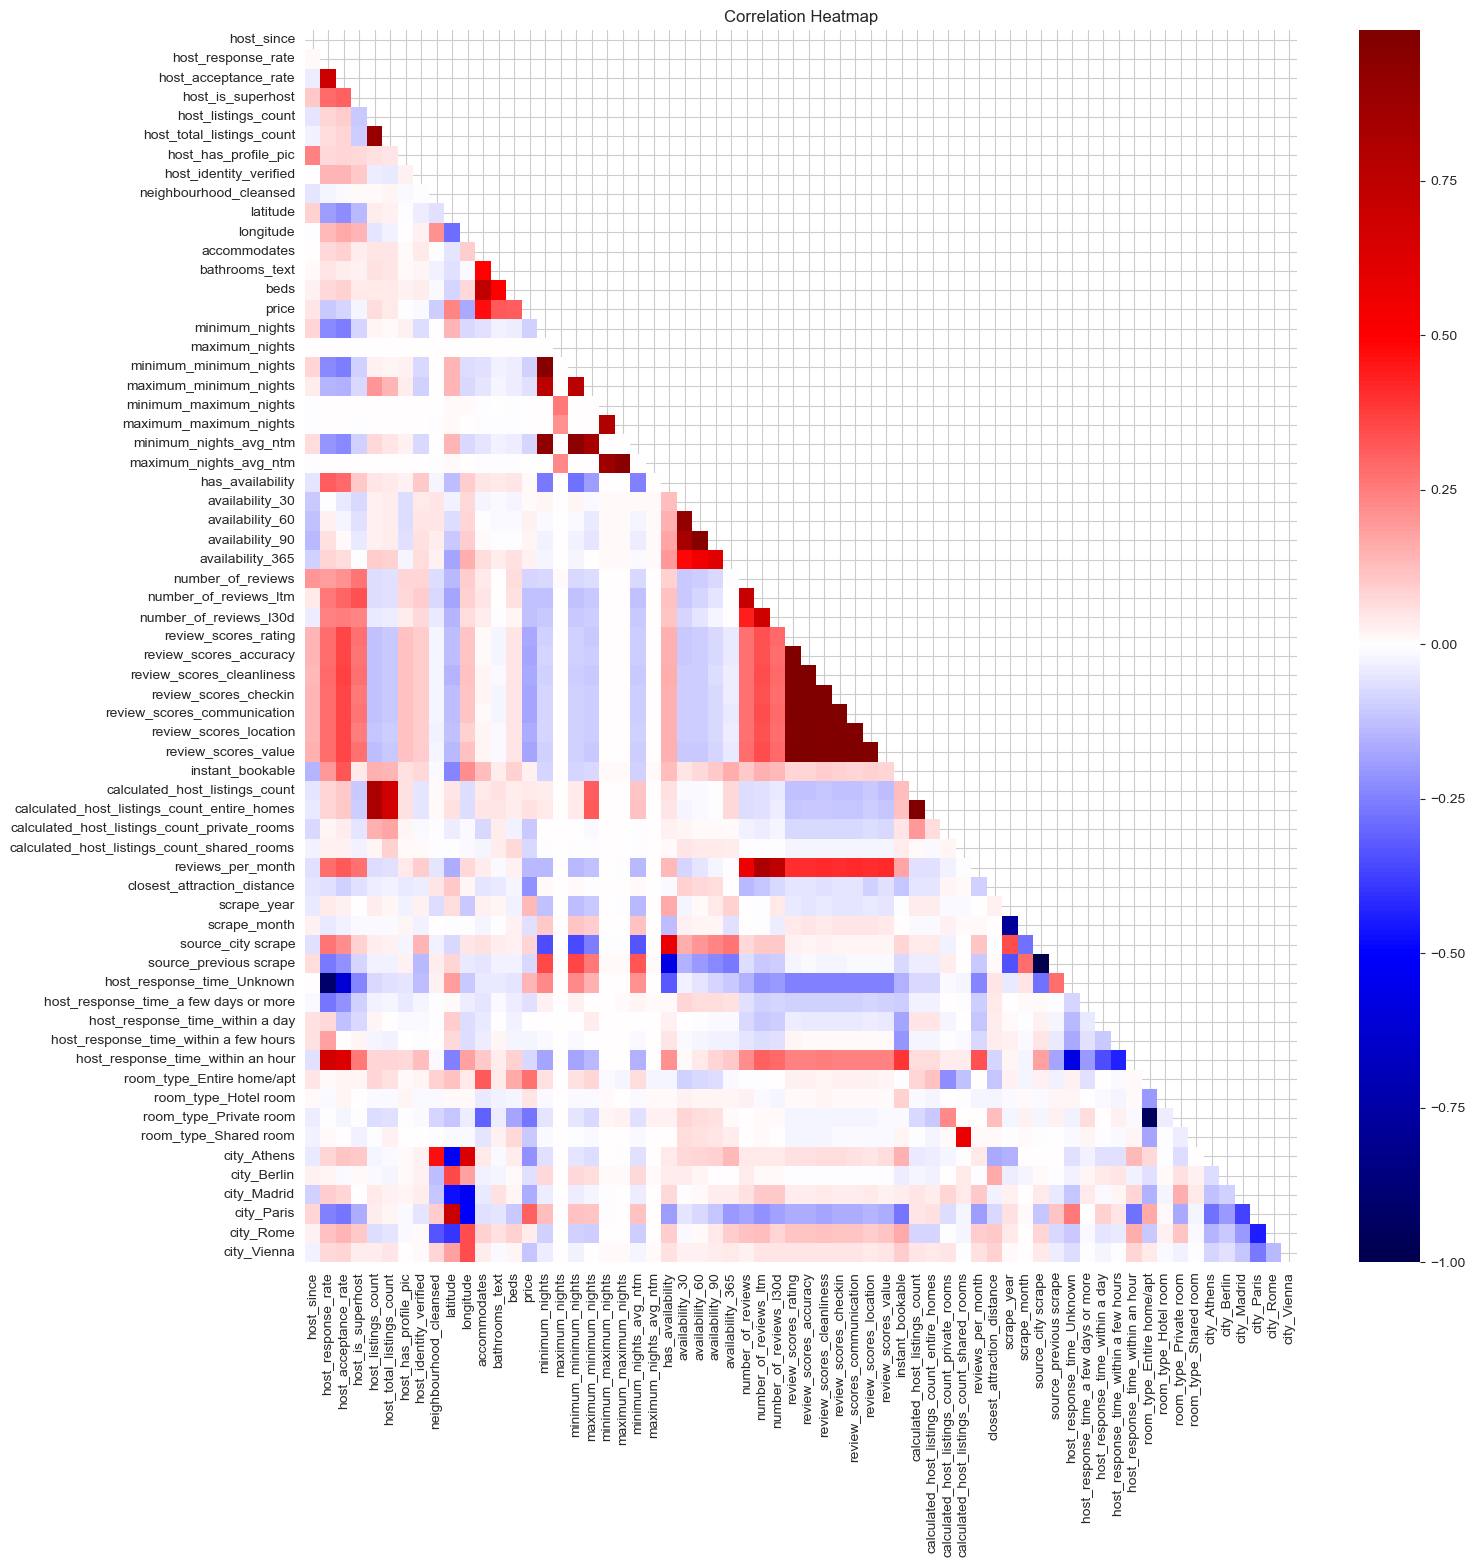

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 16))
# Create the heatmap
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=False,
            fmt=".2f",
            cmap="seismic",
            cbar=True)

# Add a title
plt.title("Correlation Heatmap")
plt.show()